In [20]:
import numpy as np
import scipy
import matplotlib

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

## Linear algebra

In [22]:
# a) Define a matrix A
A = np.array([[1,-2,3],[4,5,6],[7,1,9]])
print("a)\n", A)

# b) Define a vector b
b = np.array([1,2,3])
print("\nb)\n", b)

# c) Solve the linear system of equations Ax = b
x = scipy.linalg.solve(A, b)
print("\nc)\n", "x =", x)

# d) Check that your solution is correct by plugging it into the equation
d = A.dot(x)
print("\nd)\n", "Ax =", d, "= b")

a)
 [[ 1 -2  3]
 [ 4  5  6]
 [ 7  1  9]]

b)
 [1 2 3]

c)
 x = [ 2.56664463e-17 -1.31316702e-17  3.33333333e-01]

d)
 Ax = [1. 2. 3.] = b


In [23]:
# e) Repeat steps a-d using a random 3x3 matrix B (instead of the vector b)

# a) Define a matrix A
A = np.array([[1,-2,3],[4,5,6],[7,1,9]])
print("a)\n", A)

# b) Define a matrix b
b = np.random.rand(3,3)
print("\nb)\n", b)

# c) Solve the linear system of equations Ax = b
x = scipy.linalg.solve(A, b)
print("\nc)\n", x)

# d) Check that your solution is correct by plugging it into the equation
d = A.dot(x)
print("\nd)\n", d)

a)
 [[ 1 -2  3]
 [ 4  5  6]
 [ 7  1  9]]

b)
 [[0.87737307 0.74076862 0.69701574]
 [0.70248408 0.35949115 0.29359184]
 [0.80936116 0.81011339 0.86707232]]

c)
 [[-0.4108631  -0.22070043 -0.15057712]
 [-0.0256151  -0.07562725 -0.08880949]
 [ 0.41233533  0.27007152  0.22332463]]

d)
 [[0.87737307 0.74076862 0.69701574]
 [0.70248408 0.35949115 0.29359184]
 [0.80936116 0.81011339 0.86707232]]


In [24]:
# f) Solve the eigenvalue problem for the matrix A and print the eigenvalues and eigenvectors
eigval, eigvec  = scipy.linalg.eig(A) 
print("Eigenvalues of A:\n", eigval)
print("\nEigenvectors of A:\n", eigvec)

# g) Calculate the inverse, determinant of A
invA = scipy.linalg.inv(A)
print("\nInverse of A:\n", invA)
detA = scipy.linalg.det(A)
print("\nDeterminant of A:\n", detA)

# h) Calculate the norm of A with different orders
norm1A = scipy.linalg.norm(A, ord=1)
print("\n1-norm of A:\n", norm1A)
norm2A = scipy.linalg.norm(A, ord=2)
print("\n2-norm of A:\n", norm2A)

Eigenvalues of A:
 [-1.13261772+0.j 10.67269524+0.j  5.45992248+0.j]

Eigenvectors of A:
 [[-0.8215735   0.05324273  0.25636602]
 [-0.02150583  0.74309552 -0.93563185]
 [ 0.56969684  0.66706391 -0.24263037]]

Inverse of A:
 [[-0.59090909 -0.31818182  0.40909091]
 [-0.09090909  0.18181818 -0.09090909]
 [ 0.46969697  0.22727273 -0.1969697 ]]

Determinant of A:
 -66.0

1-norm of A:
 18.0

2-norm of A:
 14.173659390884978


## Stats

### Poisson distribution

In [25]:
import scipy.stats as stats
mu = 2
poisson_rv = stats.poisson(mu=mu)
print(poisson_rv)

We've now generated a random, discrete Poisson variable with mean mu=2

#### Compute the probability of observing k=3 events

In [26]:
k = 0
prob = poisson_rv.pmf(k)
print(prob)

0.13533528323661267


#### Probability mass function

(0.0, 0.3)

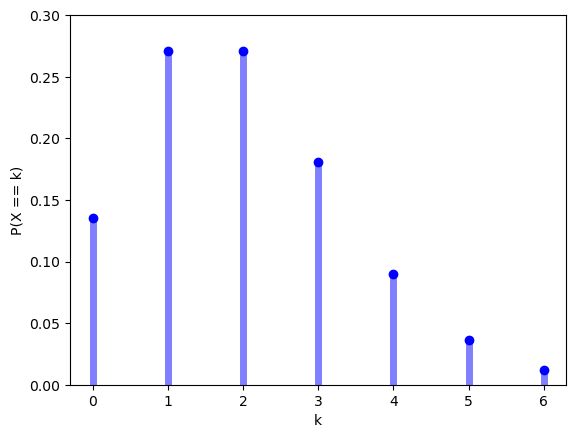

In [27]:
# Define the range of k-values to plot
k_values = np.arange(0,7)

# Compute the PMF values
pmf_values = poisson_rv.pmf(k_values)

fig, ax = plt.subplots()
ax.scatter(k_values, pmf_values, color="b")
ax.set_xlabel("k")
ax.set_ylabel("P(X == k)")
ax.vlines(k_values, 0, pmf_values, colors='b', lw=5, alpha=0.5)
ax.set_xticks(k_values)
ax.set_ylim([0, 0.3])

#### Cumulative distribution function

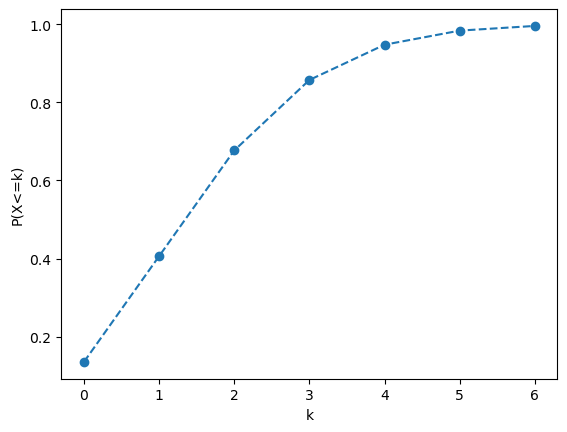

In [28]:
cdf = scipy.stats.poisson.cdf(k_values, mu)

fig, ax = plt.subplots()
ax.plot(k_values, cdf, ".--", markersize=12)
ax.set_xlabel("k")
ax.set_ylabel("P(X<=k)")
plt.show()

#### 1000 random realizations

Text(0, 0.5, 'Count')

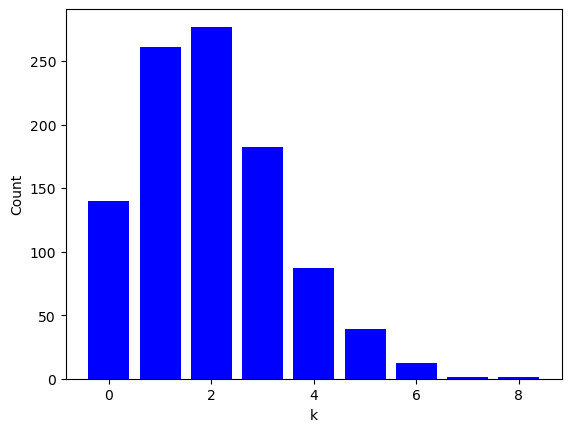

In [29]:
rvs = scipy.stats.poisson.rvs(mu,size=1000)
fig, ax = plt.subplots()
hist = np.histogram(rvs, bins=np.arange(0,10,1))

ax.bar(x=hist[1][:-1], height=hist[0], width=0.8, color="b")
ax.set_xlabel("k")
ax.set_ylabel("Count")

### Normal distribution

In [30]:
# Define the normal distribution with mean mu = 0 and standard deviation sigma = 1
mu = 0
sigma = 1
normal_rv = stats.norm(loc=mu, scale=sigma)

#### Probability density function (PDF)

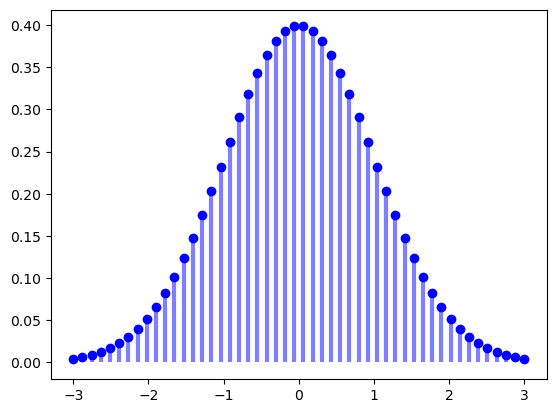

In [31]:
x_range = np.linspace(-3,3,50)
pdf = normal_rv.pdf(x_range)

fig, ax = plt.subplots()
ax.scatter(x_range, pdf, color="b")
ax.vlines(x_range, 0, pdf, colors='b', lw=3, alpha=0.5)

#### Cumulative distribution function (CDF)

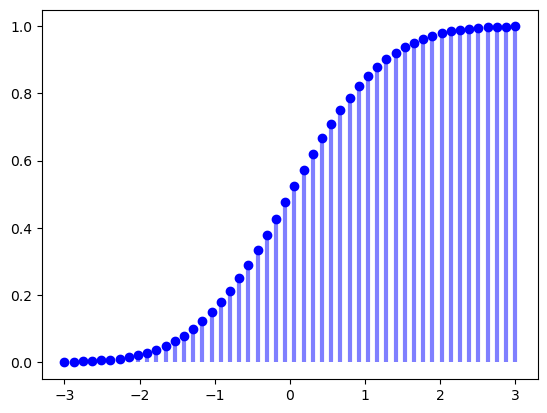

In [32]:
cdf = normal_rv.cdf(x_range)

fig, ax = plt.subplots()
ax.scatter(x_range, cdf, color="b")
ax.vlines(x_range, 0, cdf, colors='b', lw=3, alpha=0.5)

#### Histogram of 1000 random variables

Text(0, 0.5, 'Count')

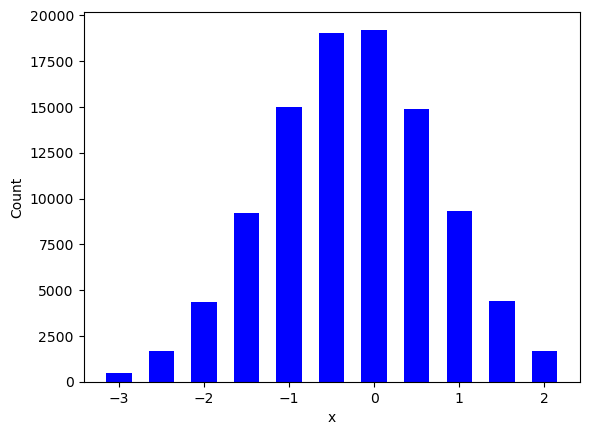

In [33]:
rvs = normal_rv.rvs(size=100000)
fig, ax = plt.subplots()
hist = np.histogram(rvs, bins=np.arange(-3,3,0.5))

ax.bar(x=hist[1][:-1], height=hist[0], width=0.3, color="b")
ax.set_xlabel("x")
ax.set_ylabel("Count")

### Test if two sets of (independent) random data comes from the same distribution

In [34]:
# Generate two independent samples
np.random.seed(42)  # For reproducibility

A = np.random.normal(loc=50, scale=10, size=100) 
B = np.random.normal(loc=55, scale=10, size=100)  

# Perform independent t-test
t, p = stats.ttest_ind(A, B)

# Display results
print(f"T-statistic: {t:.2f}")
print(f"P-value: {p:.2f}")

# Interpretation
alpha = 0.05  # Significance level
if p < alpha:
    print("Reject the null hypothesis: The two samples likely come from different distributions.")
else:
    print("Fail to reject the null hypothesis: No strong evidence that the samples come from different distributions.")

T-statistic: -4.75
P-value: 0.00
Reject the null hypothesis: The two samples likely come from different distributions.
